# Quantum Chemistry in Python (PySCF + Colab)

This notebook demonstrates simple quantum‑mechanical calculations in Google Colab using **PySCF**.


## 1. Installation
Run this once in Colab to install dependencies.

In [1]:
!pip -q install pyscf py3Dmol


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 11.4 MB/s eta 0:00:00


### Optimizing the H–H bond length

Quantum chemistry allows us to determine equilibrium structures by finding the geometry with **minimum total energy**.

In this example, we compute the **energy of H₂** at different bond lengths using **Hartree–Fock (RHF)** with the STO-3G basis set.  
By scanning the H–H distance and plotting the potential energy curve, we can identify the **equilibrium bond length** —  
the point where attraction and repulsion between the nuclei and electrons are perfectly balanced.


Grid minimum:     R = 0.7414 Å   E = -1.132956 Eh
Refined minimum:  R = 0.7395 Å   E = -1.132968 Eh


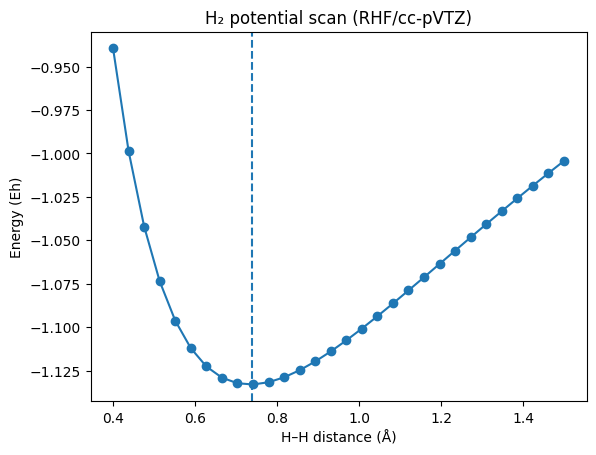

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf

def h2_energy(R, basis="STO-3G", method="RHF"):
    """Total energy of H2 at distance R (Å) with the chosen method/basis."""
    mol = gto.Mole()
    mol.build(atom=f"H 0 0 0; H 0 0 {R}", unit="Angstrom", basis=basis, spin=0, charge=0)
    if method == "RHF":
        mf = scf.RHF(mol).run(conv_tol=1e-12, verbose=0)
    else:
        from pyscf import dft
        mf = dft.RKS(mol, xc=method).run(conv_tol=1e-12, verbose=0)
    return mf.e_tot

# Scan distances (Å)
Rs = np.linspace(0.40, 1.50, 30)
Es = np.array([h2_energy(R, basis="cc-pVTZ", method="RHF") for R in Rs])

# Locate minimum on the grid
imin = int(Es.argmin())
Rmin_grid = Rs[imin]
Emin_grid = Es[imin]

# Refine with a local quadratic fit around the minimum
i0 = max(0, imin-2); i1 = min(len(Rs), imin+3)
coef = np.polyfit(Rs[i0:i1], Es[i0:i1], 2)          # E(R) ≈ aR^2 + bR + c
Rmin_fit = -coef[1] / (2*coef[0])
Emin_fit = np.polyval(coef, Rmin_fit)

print(f"Grid minimum:     R = {Rmin_grid:.4f} Å   E = {Emin_grid:.6f} Eh")
print(f"Refined minimum:  R = {Rmin_fit:.4f} Å   E = {Emin_fit:.6f} Eh")

# Plot
plt.plot(Rs, Es, marker="o")
plt.axvline(Rmin_fit, linestyle="--")
plt.xlabel("H–H distance (Å)")
plt.ylabel("Energy (Eh)")
plt.title("H₂ potential scan (RHF/STO-3G)")
plt.show()
